In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
image = cv2.imread("./input.jpg")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

Text(0.5, 1.0, 'Histogram for RGB Channels')

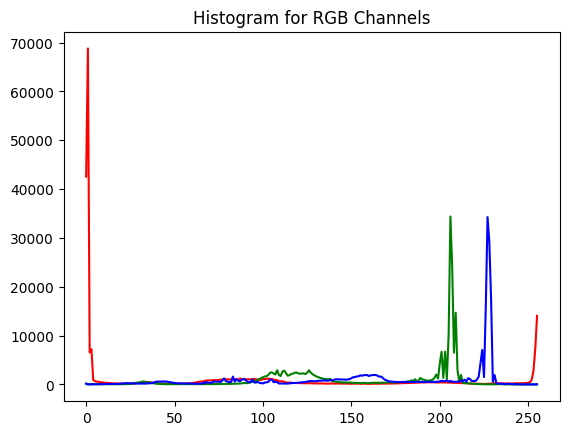

In [3]:
channels = cv2.split(image_rgb)
colors = ['red','green','blue']

for channel, color in zip(channels, colors):
    hist = cv2.calcHist([channel], [0], None,[256],[0,256])
    plt.plot(hist, color=color)

plt.title("Histogram for RGB Channels")

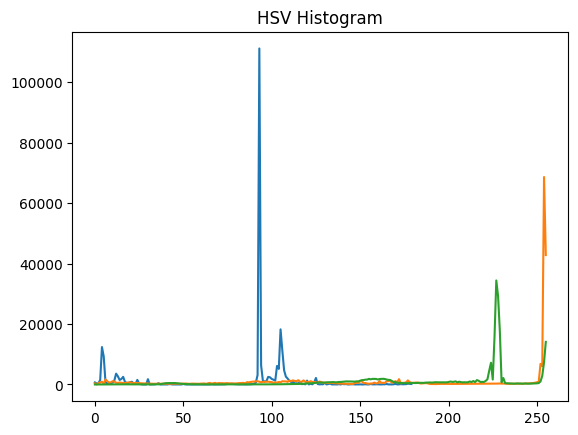

In [4]:
h,s,v = cv2.split(image_hsv)

h_hist = cv2.calcHist([h], [0], None,[180],[0,180])
s_hist = cv2.calcHist([s], [0], None,[256],[0,256])
v_hist = cv2.calcHist([v], [0], None,[256],[0,256])

plt.title("HSV Histogram")
plt.plot(h_hist)
plt.plot(s_hist)
plt.plot(v_hist)
plt.show()

### Histogram Equalization

In [5]:
hist, bins  = np.histogram(image_gray.flatten(),256,[0,256])

# Histogram Equalization
equalized_image = cv2.equalizeHist(image_gray)

equalized_hist, bins = np.histogram(equalized_image.flatten(), 256, [0,256])

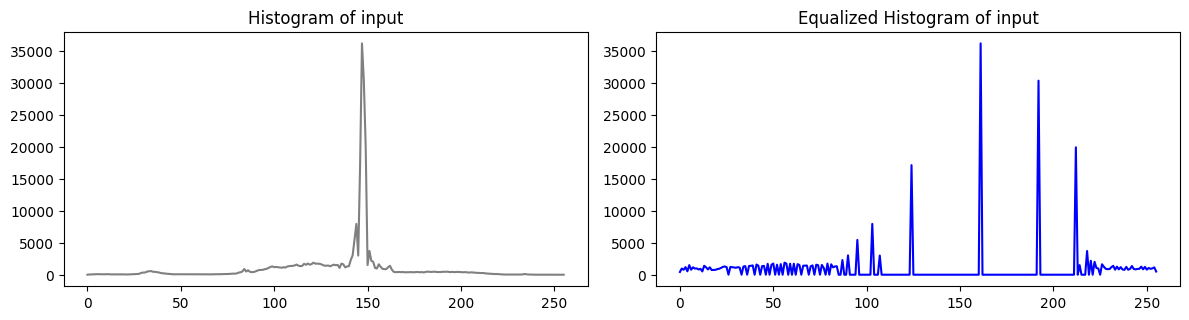

In [6]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
plt.plot(hist, color='grey')
plt.title("Histogram of input")


plt.subplot(2,2,2)
plt.plot(equalized_hist, color='Blue')
plt.title("Equalized Histogram of input")

plt.tight_layout()
plt.show()

In [17]:
image_yuv = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)

In [18]:
image_yuv[:,:,0] = cv2.equalizeHist(image_yuv[:,:,0])

In [22]:
equalized_image_2 = cv2.cvtColor(image_yuv, cv2.COLOR_YUV2BGR)

In [23]:
equalized_image_rgb = cv2.cvtColor(equalized_image_2, cv2.COLOR_BGR2RGB)

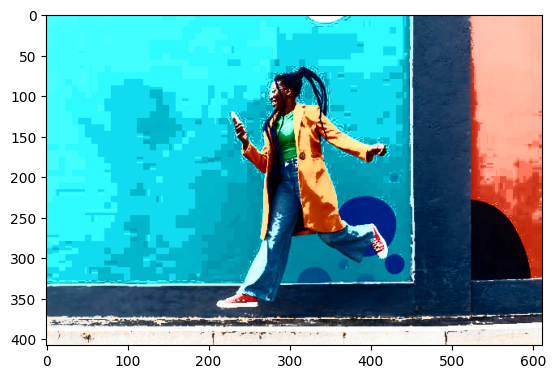

In [24]:
plt.imshow(equalized_image_rgb)

### CLAHE

In [7]:
image_gray

array([[151, 151, 151, ..., 157, 157, 157],
       [151, 151, 151, ..., 157, 157, 157],
       [151, 151, 151, ..., 157, 157, 157],
       ...,
       [195, 199, 200, ..., 188, 187, 189],
       [204, 204, 201, ..., 188, 180, 182],
       [202, 201, 198, ..., 176, 164, 166]], shape=(408, 612), dtype=uint8)

In [8]:
equalized_image = cv2.equalizeHist(image_gray)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(4,4))


In [9]:
clahe_equalized_hist = clahe.apply(image_gray)

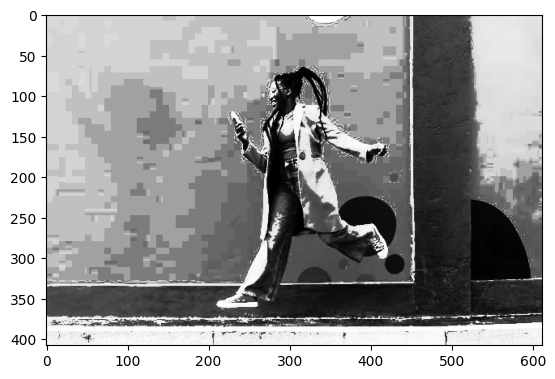

In [11]:
plt.imshow(equalized_image, cmap='gray')

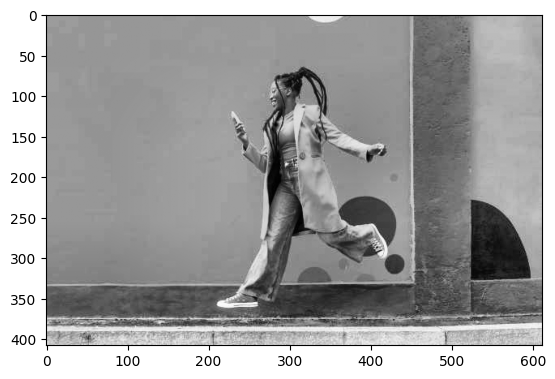

In [12]:
plt.imshow(clahe_equalized_hist, cmap='gray')

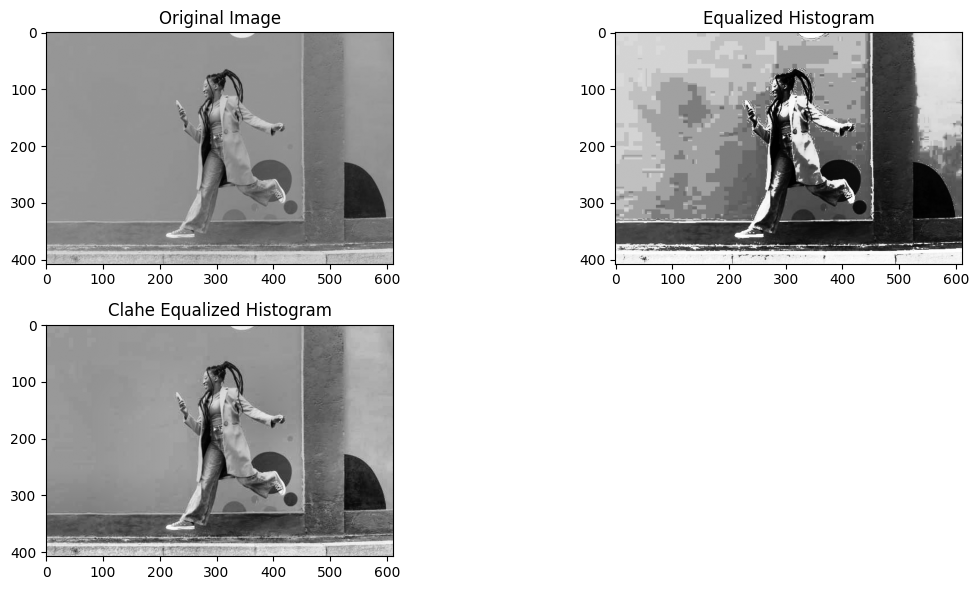

In [16]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
plt.imshow(image_gray, cmap='gray')
plt.title("Original Image")


plt.subplot(2,2,2)
plt.imshow(equalized_image, cmap='gray')
plt.title("Equalized Histogram")

plt.subplot(2,2,3)
plt.imshow(clahe_equalized_hist, cmap='gray')
plt.title("Clahe Equalized Histogram")

plt.tight_layout()
plt.show()